In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def load_image(path: str)-> np.array:
  return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

In [4]:
class ImageDataset(Dataset):
    def __init__(self, image_paths):
        self.image_paths = image_paths

    def __getitem__(self, index):
        image = load_image(self.image_paths[index])
        image = image.reshape(1, -1)
        return  torch.from_numpy(image).float()

    def __len__(self):
        return len(self.image_paths)

In [5]:
image_paths = glob("/content/drive/MyDrive/img_data/*.png")

In [6]:
image_paths.__len__()

2490

In [7]:
image_ds = ImageDataset(image_paths=image_paths)

In [8]:
image_ds[5].shape

torch.Size([1, 165888])

In [9]:
images_dl = DataLoader(image_ds, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)

In [10]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(165888, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 18),
            # torch.nn.ReLU(),
            # torch.nn.Linear(18, 9)
        )

        self.decoder = torch.nn.Sequential(
            # torch.nn.Linear(9, 18),
            # torch.nn.ReLU(),
            torch.nn.Linear(18, 36),
            torch.nn.ReLU(),
            torch.nn.Linear(36, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 165888),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [11]:
# Model Initialization
model = AE()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-3,
                             weight_decay = 1e-8)

In [12]:
next(iter(images_dl)).shape

torch.Size([32, 1, 165888])

In [13]:
epochs = 20
outputs = []
losses = []
for epoch in range(epochs):

    for image_batch in images_dl:

      # Output of Autoencoder
      reconstructed = model(image_batch)

      # Calculating the loss function
      loss = loss_function(reconstructed, image_batch)

      # The gradients are set to zero,
      # the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Storing the losses in a list for plotting
      losses.append(float(loss.detach().detach()))
      print(float(loss.detach().detach()))
    outputs.append((epochs, image_batch, reconstructed))

63687.09375
63712.1171875
63705.5
63595.07421875
63589.46875
63626.90234375
63631.94921875
63634.45703125
63523.9375
63601.83203125
63568.359375
63664.56640625
63620.06640625
63563.78515625
63586.87109375
63481.2890625
63533.80859375
63593.89453125
63542.890625
63546.77734375
63529.296875
63551.48046875
63534.9921875
63514.2890625
63601.9375
63492.42578125
63486.46875
63489.16796875
63512.296875
63498.7421875
63403.40234375
63543.01171875
63505.09375
63556.1796875
63509.90625
63537.7109375
63568.01171875
63498.859375
63508.56640625
63477.44921875
63593.4921875
63458.83984375
63462.75390625
63562.09375
63534.43359375
63559.72265625
63497.375
63469.25390625
63520.9921875
63466.265625
63557.71484375
63498.86328125
63532.56640625
63514.27734375
63552.24609375
63561.875
63515.4375
63494.96484375
63508.37109375
63443.2578125
63523.05078125
63592.7421875
63522.2734375
63497.140625
63527.69140625
63559.5078125
63546.69921875
63575.3203125
63512.69140625
63494.19921875
63519.57421875
63460.0429

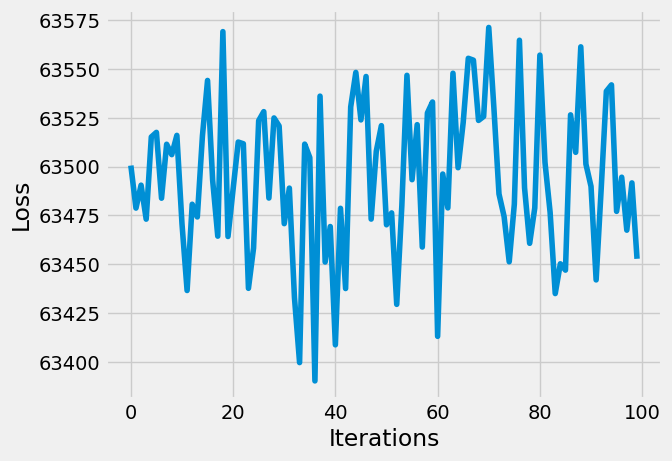

In [14]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses[-100:])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch [1/20], Loss: 0.2125
Epoch [1/20], Loss: 0.2118
Epoch [1/20], Loss: 0.2105
Epoch [1/20], Loss: 0.2098
Epoch [1/20], Loss: 0.2082
Epoch [1/20], Loss: 0.2073
Epoch [1/20], Loss: 0.2046
Epoch [1/20], Loss: 0.2008
Epoch [1/20], Loss: 0.1936
Epoch [1/20], Loss: 0.1824
Epoch [1/20], Loss: 0.1676
Epoch [1/20], Loss: 0.1542
Epoch [1/20], Loss: 0.1431
Epoch [1/20], Loss: 0.1282
Epoch [1/20], Loss: 0.1093
Epoch [1/20], Loss: 0.0891
Epoch [1/20], Loss: 0.0699
Epoch [1/20], Loss: 0.0517
Epoch [1/20], Loss: 0.0349
Epoch [1/20], Loss: 0.0209
Epoch [1/20], Loss: 0.0118
Epoch [1/20], Loss: 0.0067
Epoch [1/20], Loss: 0.0044
Epoch [1/20], Loss: 0.0038
Epoch [1/20], Loss: 0.0037
Epoch [1/20], Loss: 0.0034
Epoch [1/20], Loss: 0.0034
Epoch [1/20], Loss: 0.0034
Epoch [1/20], Loss: 0.0031
Epoch [1/20], Loss: 0.0031
Epoch [1/20], Loss: 0.0031
Epoch [1/20], Loss: 0.0032
Epoch [

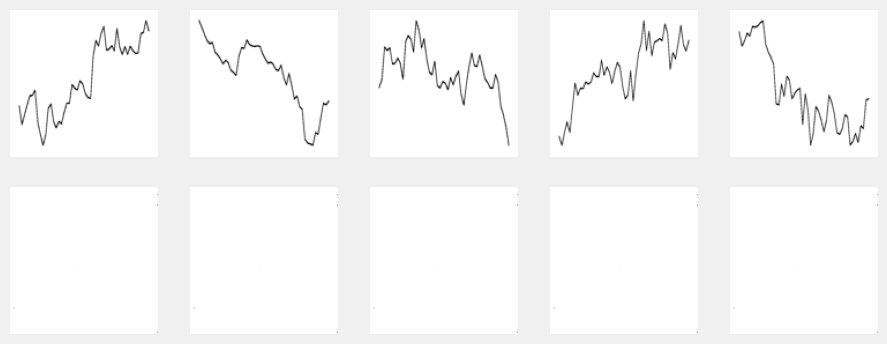

Epoch [2/20], Loss: 0.0031
Epoch [2/20], Loss: 0.0031
Epoch [2/20], Loss: 0.0034
Epoch [2/20], Loss: 0.0033
Epoch [2/20], Loss: 0.0032
Epoch [2/20], Loss: 0.0032
Epoch [2/20], Loss: 0.0033
Epoch [2/20], Loss: 0.0033
Epoch [2/20], Loss: 0.0031
Epoch [2/20], Loss: 0.0034
Epoch [2/20], Loss: 0.0031
Epoch [2/20], Loss: 0.0032
Epoch [2/20], Loss: 0.0032
Epoch [2/20], Loss: 0.0032
Epoch [2/20], Loss: 0.0033
Epoch [2/20], Loss: 0.0034
Epoch [2/20], Loss: 0.0030
Epoch [2/20], Loss: 0.0033
Epoch [2/20], Loss: 0.0033
Epoch [2/20], Loss: 0.0031
Epoch [2/20], Loss: 0.0031
Epoch [2/20], Loss: 0.0033
Epoch [2/20], Loss: 0.0031
Epoch [2/20], Loss: 0.0032
Epoch [2/20], Loss: 0.0032
Epoch [2/20], Loss: 0.0033
Epoch [2/20], Loss: 0.0032
Epoch [2/20], Loss: 0.0032
Epoch [2/20], Loss: 0.0031
Epoch [2/20], Loss: 0.0033
Epoch [2/20], Loss: 0.0034
Epoch [2/20], Loss: 0.0031
Epoch [2/20], Loss: 0.0031
Epoch [2/20], Loss: 0.0031
Epoch [2/20], Loss: 0.0032
Epoch [2/20], Loss: 0.0032
Epoch [2/20], Loss: 0.0033
E

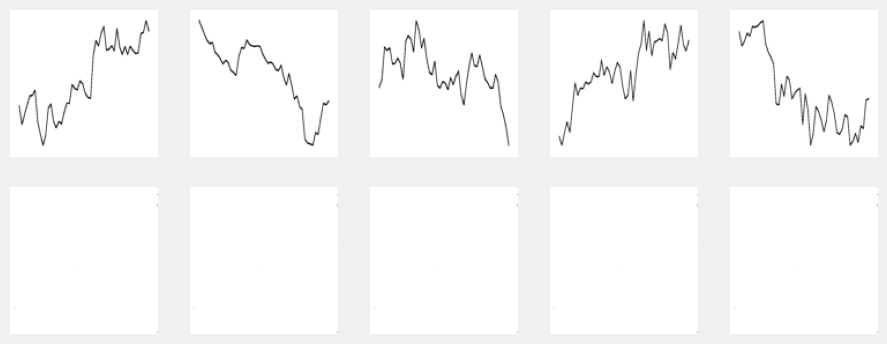

Epoch [3/20], Loss: 0.0034
Epoch [3/20], Loss: 0.0032
Epoch [3/20], Loss: 0.0033
Epoch [3/20], Loss: 0.0034
Epoch [3/20], Loss: 0.0033
Epoch [3/20], Loss: 0.0031
Epoch [3/20], Loss: 0.0032
Epoch [3/20], Loss: 0.0032
Epoch [3/20], Loss: 0.0031
Epoch [3/20], Loss: 0.0032
Epoch [3/20], Loss: 0.0031
Epoch [3/20], Loss: 0.0033
Epoch [3/20], Loss: 0.0032
Epoch [3/20], Loss: 0.0033
Epoch [3/20], Loss: 0.0033
Epoch [3/20], Loss: 0.0033
Epoch [3/20], Loss: 0.0031
Epoch [3/20], Loss: 0.0032
Epoch [3/20], Loss: 0.0034
Epoch [3/20], Loss: 0.0031
Epoch [3/20], Loss: 0.0033
Epoch [3/20], Loss: 0.0032
Epoch [3/20], Loss: 0.0033
Epoch [3/20], Loss: 0.0032
Epoch [3/20], Loss: 0.0031
Epoch [3/20], Loss: 0.0034
Epoch [3/20], Loss: 0.0032
Epoch [3/20], Loss: 0.0034
Epoch [3/20], Loss: 0.0031
Epoch [3/20], Loss: 0.0032
Epoch [3/20], Loss: 0.0032
Epoch [3/20], Loss: 0.0032
Epoch [3/20], Loss: 0.0033
Epoch [3/20], Loss: 0.0030
Epoch [3/20], Loss: 0.0031
Epoch [3/20], Loss: 0.0033
Epoch [3/20], Loss: 0.0032
E

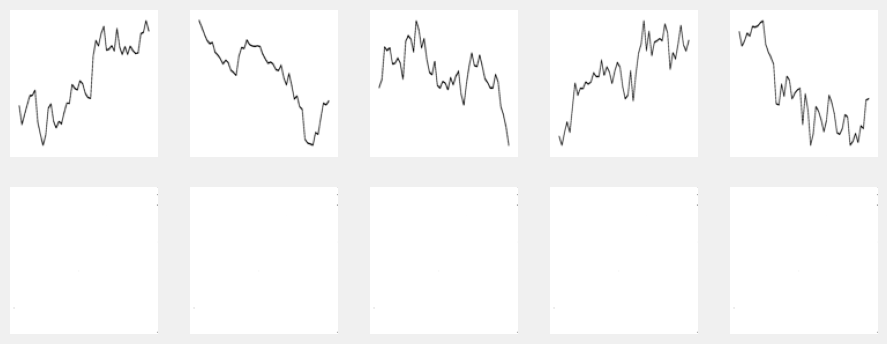

Epoch [4/20], Loss: 0.0032
Epoch [4/20], Loss: 0.0033
Epoch [4/20], Loss: 0.0031
Epoch [4/20], Loss: 0.0032
Epoch [4/20], Loss: 0.0032
Epoch [4/20], Loss: 0.0033
Epoch [4/20], Loss: 0.0031
Epoch [4/20], Loss: 0.0032
Epoch [4/20], Loss: 0.0031
Epoch [4/20], Loss: 0.0031
Epoch [4/20], Loss: 0.0032
Epoch [4/20], Loss: 0.0031
Epoch [4/20], Loss: 0.0032
Epoch [4/20], Loss: 0.0032
Epoch [4/20], Loss: 0.0032
Epoch [4/20], Loss: 0.0033
Epoch [4/20], Loss: 0.0032
Epoch [4/20], Loss: 0.0032
Epoch [4/20], Loss: 0.0031
Epoch [4/20], Loss: 0.0033
Epoch [4/20], Loss: 0.0032
Epoch [4/20], Loss: 0.0031
Epoch [4/20], Loss: 0.0036
Epoch [4/20], Loss: 0.0033
Epoch [4/20], Loss: 0.0033
Epoch [4/20], Loss: 0.0033
Epoch [4/20], Loss: 0.0032
Epoch [4/20], Loss: 0.0032
Epoch [4/20], Loss: 0.0031
Epoch [4/20], Loss: 0.0035
Epoch [4/20], Loss: 0.0032
Epoch [4/20], Loss: 0.0033
Epoch [4/20], Loss: 0.0033
Epoch [4/20], Loss: 0.0033
Epoch [4/20], Loss: 0.0033
Epoch [4/20], Loss: 0.0033
Epoch [4/20], Loss: 0.0032
E

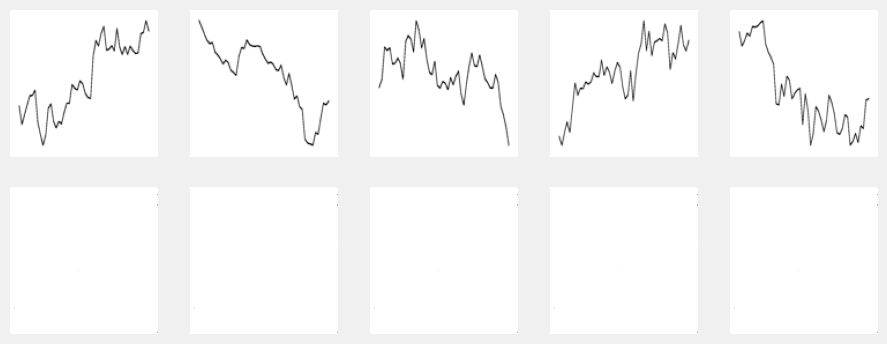

Epoch [5/20], Loss: 0.0033
Epoch [5/20], Loss: 0.0033
Epoch [5/20], Loss: 0.0031
Epoch [5/20], Loss: 0.0032
Epoch [5/20], Loss: 0.0033
Epoch [5/20], Loss: 0.0031
Epoch [5/20], Loss: 0.0032
Epoch [5/20], Loss: 0.0033
Epoch [5/20], Loss: 0.0032
Epoch [5/20], Loss: 0.0032
Epoch [5/20], Loss: 0.0032
Epoch [5/20], Loss: 0.0032
Epoch [5/20], Loss: 0.0030
Epoch [5/20], Loss: 0.0031
Epoch [5/20], Loss: 0.0032
Epoch [5/20], Loss: 0.0034
Epoch [5/20], Loss: 0.0031
Epoch [5/20], Loss: 0.0034
Epoch [5/20], Loss: 0.0033
Epoch [5/20], Loss: 0.0033
Epoch [5/20], Loss: 0.0032
Epoch [5/20], Loss: 0.0032
Epoch [5/20], Loss: 0.0035
Epoch [5/20], Loss: 0.0032
Epoch [5/20], Loss: 0.0031
Epoch [5/20], Loss: 0.0033
Epoch [5/20], Loss: 0.0032
Epoch [5/20], Loss: 0.0033
Epoch [5/20], Loss: 0.0034
Epoch [5/20], Loss: 0.0031
Epoch [5/20], Loss: 0.0032
Epoch [5/20], Loss: 0.0034
Epoch [5/20], Loss: 0.0033
Epoch [5/20], Loss: 0.0032
Epoch [5/20], Loss: 0.0031
Epoch [5/20], Loss: 0.0032
Epoch [5/20], Loss: 0.0030
E

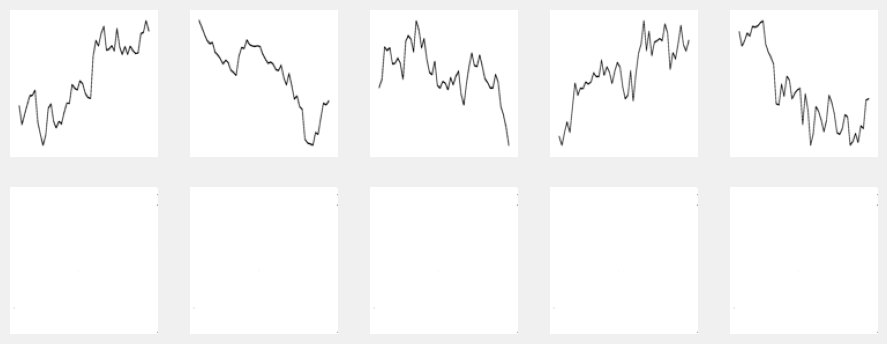

Epoch [6/20], Loss: 0.0032
Epoch [6/20], Loss: 0.0033
Epoch [6/20], Loss: 0.0033
Epoch [6/20], Loss: 0.0033
Epoch [6/20], Loss: 0.0033
Epoch [6/20], Loss: 0.0032
Epoch [6/20], Loss: 0.0033
Epoch [6/20], Loss: 0.0033
Epoch [6/20], Loss: 0.0033
Epoch [6/20], Loss: 0.0031
Epoch [6/20], Loss: 0.0031
Epoch [6/20], Loss: 0.0032
Epoch [6/20], Loss: 0.0034
Epoch [6/20], Loss: 0.0033
Epoch [6/20], Loss: 0.0031
Epoch [6/20], Loss: 0.0032
Epoch [6/20], Loss: 0.0032
Epoch [6/20], Loss: 0.0032
Epoch [6/20], Loss: 0.0033
Epoch [6/20], Loss: 0.0032
Epoch [6/20], Loss: 0.0033
Epoch [6/20], Loss: 0.0031
Epoch [6/20], Loss: 0.0031
Epoch [6/20], Loss: 0.0032
Epoch [6/20], Loss: 0.0031
Epoch [6/20], Loss: 0.0033
Epoch [6/20], Loss: 0.0032
Epoch [6/20], Loss: 0.0034
Epoch [6/20], Loss: 0.0032
Epoch [6/20], Loss: 0.0031
Epoch [6/20], Loss: 0.0033
Epoch [6/20], Loss: 0.0032
Epoch [6/20], Loss: 0.0031
Epoch [6/20], Loss: 0.0032
Epoch [6/20], Loss: 0.0034
Epoch [6/20], Loss: 0.0033
Epoch [6/20], Loss: 0.0033
E

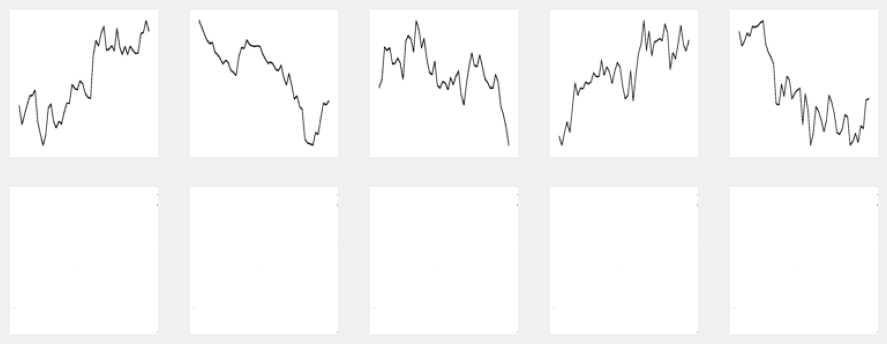

Epoch [7/20], Loss: 0.0034
Epoch [7/20], Loss: 0.0032
Epoch [7/20], Loss: 0.0033
Epoch [7/20], Loss: 0.0033
Epoch [7/20], Loss: 0.0031
Epoch [7/20], Loss: 0.0031
Epoch [7/20], Loss: 0.0034
Epoch [7/20], Loss: 0.0031
Epoch [7/20], Loss: 0.0031
Epoch [7/20], Loss: 0.0031
Epoch [7/20], Loss: 0.0031
Epoch [7/20], Loss: 0.0033
Epoch [7/20], Loss: 0.0031
Epoch [7/20], Loss: 0.0032
Epoch [7/20], Loss: 0.0032
Epoch [7/20], Loss: 0.0032
Epoch [7/20], Loss: 0.0033
Epoch [7/20], Loss: 0.0032
Epoch [7/20], Loss: 0.0031
Epoch [7/20], Loss: 0.0033
Epoch [7/20], Loss: 0.0030
Epoch [7/20], Loss: 0.0031
Epoch [7/20], Loss: 0.0033
Epoch [7/20], Loss: 0.0032
Epoch [7/20], Loss: 0.0034
Epoch [7/20], Loss: 0.0032
Epoch [7/20], Loss: 0.0033
Epoch [7/20], Loss: 0.0031
Epoch [7/20], Loss: 0.0032
Epoch [7/20], Loss: 0.0032
Epoch [7/20], Loss: 0.0033
Epoch [7/20], Loss: 0.0031
Epoch [7/20], Loss: 0.0031
Epoch [7/20], Loss: 0.0033
Epoch [7/20], Loss: 0.0033
Epoch [7/20], Loss: 0.0033
Epoch [7/20], Loss: 0.0031
E

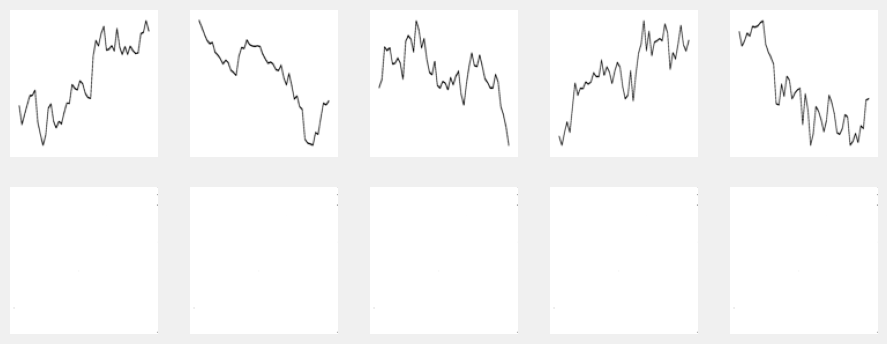

Epoch [8/20], Loss: 0.0032
Epoch [8/20], Loss: 0.0032
Epoch [8/20], Loss: 0.0033
Epoch [8/20], Loss: 0.0031
Epoch [8/20], Loss: 0.0032
Epoch [8/20], Loss: 0.0032
Epoch [8/20], Loss: 0.0031
Epoch [8/20], Loss: 0.0031
Epoch [8/20], Loss: 0.0032
Epoch [8/20], Loss: 0.0033
Epoch [8/20], Loss: 0.0030
Epoch [8/20], Loss: 0.0032
Epoch [8/20], Loss: 0.0035
Epoch [8/20], Loss: 0.0034
Epoch [8/20], Loss: 0.0032
Epoch [8/20], Loss: 0.0034
Epoch [8/20], Loss: 0.0032
Epoch [8/20], Loss: 0.0034
Epoch [8/20], Loss: 0.0033
Epoch [8/20], Loss: 0.0034
Epoch [8/20], Loss: 0.0031
Epoch [8/20], Loss: 0.0033
Epoch [8/20], Loss: 0.0033
Epoch [8/20], Loss: 0.0032
Epoch [8/20], Loss: 0.0032
Epoch [8/20], Loss: 0.0032
Epoch [8/20], Loss: 0.0033
Epoch [8/20], Loss: 0.0031
Epoch [8/20], Loss: 0.0033
Epoch [8/20], Loss: 0.0033
Epoch [8/20], Loss: 0.0032
Epoch [8/20], Loss: 0.0031
Epoch [8/20], Loss: 0.0032
Epoch [8/20], Loss: 0.0031
Epoch [8/20], Loss: 0.0032
Epoch [8/20], Loss: 0.0033
Epoch [8/20], Loss: 0.0034
E

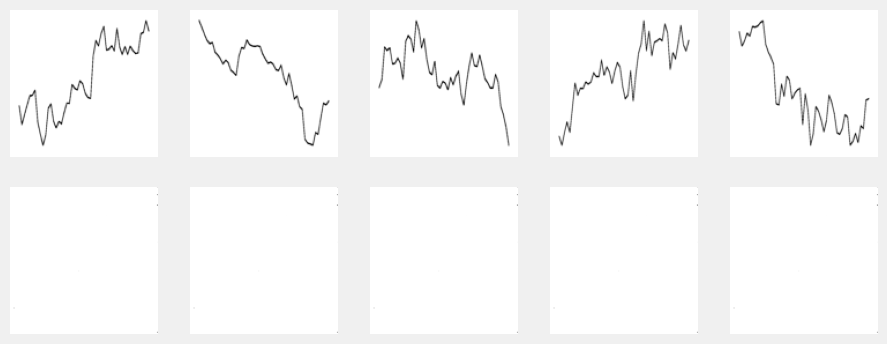

Epoch [9/20], Loss: 0.0033
Epoch [9/20], Loss: 0.0033
Epoch [9/20], Loss: 0.0031
Epoch [9/20], Loss: 0.0030
Epoch [9/20], Loss: 0.0032
Epoch [9/20], Loss: 0.0032
Epoch [9/20], Loss: 0.0034
Epoch [9/20], Loss: 0.0033
Epoch [9/20], Loss: 0.0031
Epoch [9/20], Loss: 0.0032
Epoch [9/20], Loss: 0.0032
Epoch [9/20], Loss: 0.0031
Epoch [9/20], Loss: 0.0033
Epoch [9/20], Loss: 0.0031
Epoch [9/20], Loss: 0.0031
Epoch [9/20], Loss: 0.0032
Epoch [9/20], Loss: 0.0032
Epoch [9/20], Loss: 0.0033
Epoch [9/20], Loss: 0.0032
Epoch [9/20], Loss: 0.0033
Epoch [9/20], Loss: 0.0033
Epoch [9/20], Loss: 0.0033
Epoch [9/20], Loss: 0.0033
Epoch [9/20], Loss: 0.0031
Epoch [9/20], Loss: 0.0033
Epoch [9/20], Loss: 0.0032
Epoch [9/20], Loss: 0.0033
Epoch [9/20], Loss: 0.0035
Epoch [9/20], Loss: 0.0032
Epoch [9/20], Loss: 0.0033
Epoch [9/20], Loss: 0.0031
Epoch [9/20], Loss: 0.0032
Epoch [9/20], Loss: 0.0032
Epoch [9/20], Loss: 0.0033
Epoch [9/20], Loss: 0.0032
Epoch [9/20], Loss: 0.0033
Epoch [9/20], Loss: 0.0034
E

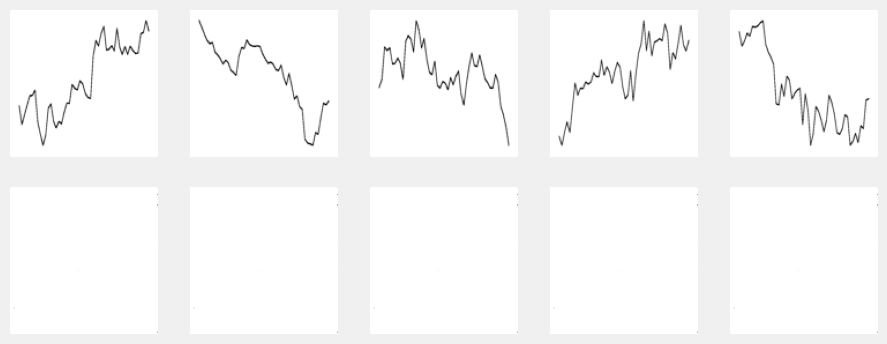

Epoch [10/20], Loss: 0.0031
Epoch [10/20], Loss: 0.0031
Epoch [10/20], Loss: 0.0032
Epoch [10/20], Loss: 0.0033
Epoch [10/20], Loss: 0.0032
Epoch [10/20], Loss: 0.0031
Epoch [10/20], Loss: 0.0032
Epoch [10/20], Loss: 0.0034
Epoch [10/20], Loss: 0.0033
Epoch [10/20], Loss: 0.0033
Epoch [10/20], Loss: 0.0031
Epoch [10/20], Loss: 0.0033
Epoch [10/20], Loss: 0.0032
Epoch [10/20], Loss: 0.0033
Epoch [10/20], Loss: 0.0031
Epoch [10/20], Loss: 0.0031
Epoch [10/20], Loss: 0.0032
Epoch [10/20], Loss: 0.0033
Epoch [10/20], Loss: 0.0031
Epoch [10/20], Loss: 0.0033
Epoch [10/20], Loss: 0.0033
Epoch [10/20], Loss: 0.0031
Epoch [10/20], Loss: 0.0032
Epoch [10/20], Loss: 0.0032
Epoch [10/20], Loss: 0.0033
Epoch [10/20], Loss: 0.0034
Epoch [10/20], Loss: 0.0032
Epoch [10/20], Loss: 0.0032
Epoch [10/20], Loss: 0.0031
Epoch [10/20], Loss: 0.0033
Epoch [10/20], Loss: 0.0034
Epoch [10/20], Loss: 0.0032
Epoch [10/20], Loss: 0.0032
Epoch [10/20], Loss: 0.0033
Epoch [10/20], Loss: 0.0031
Epoch [10/20], Loss:

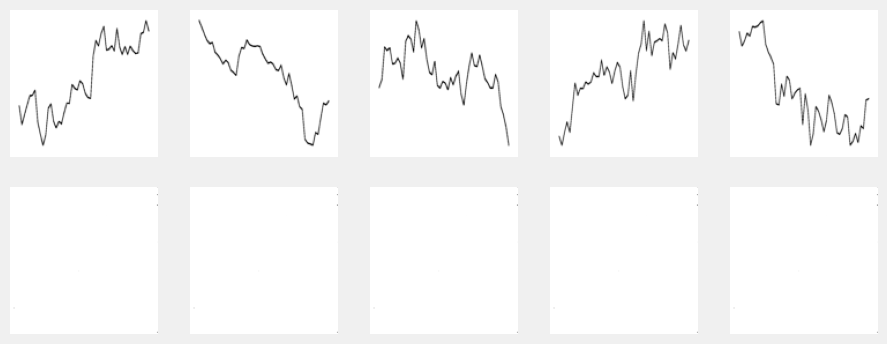

Epoch [11/20], Loss: 0.0032
Epoch [11/20], Loss: 0.0032
Epoch [11/20], Loss: 0.0033
Epoch [11/20], Loss: 0.0032
Epoch [11/20], Loss: 0.0031
Epoch [11/20], Loss: 0.0033
Epoch [11/20], Loss: 0.0033
Epoch [11/20], Loss: 0.0034
Epoch [11/20], Loss: 0.0031
Epoch [11/20], Loss: 0.0032
Epoch [11/20], Loss: 0.0031
Epoch [11/20], Loss: 0.0031
Epoch [11/20], Loss: 0.0031
Epoch [11/20], Loss: 0.0033
Epoch [11/20], Loss: 0.0032
Epoch [11/20], Loss: 0.0031
Epoch [11/20], Loss: 0.0032
Epoch [11/20], Loss: 0.0032
Epoch [11/20], Loss: 0.0031
Epoch [11/20], Loss: 0.0033
Epoch [11/20], Loss: 0.0032
Epoch [11/20], Loss: 0.0033
Epoch [11/20], Loss: 0.0031
Epoch [11/20], Loss: 0.0032
Epoch [11/20], Loss: 0.0032
Epoch [11/20], Loss: 0.0032
Epoch [11/20], Loss: 0.0031
Epoch [11/20], Loss: 0.0032
Epoch [11/20], Loss: 0.0033
Epoch [11/20], Loss: 0.0031
Epoch [11/20], Loss: 0.0032
Epoch [11/20], Loss: 0.0033
Epoch [11/20], Loss: 0.0031
Epoch [11/20], Loss: 0.0032
Epoch [11/20], Loss: 0.0035
Epoch [11/20], Loss:

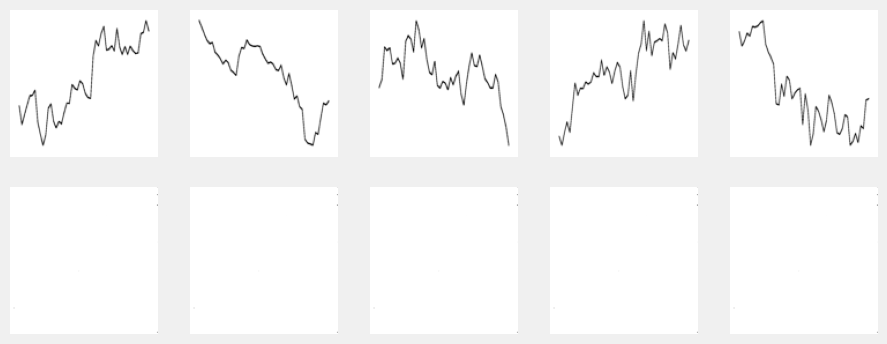

Epoch [12/20], Loss: 0.0032
Epoch [12/20], Loss: 0.0032
Epoch [12/20], Loss: 0.0033
Epoch [12/20], Loss: 0.0033
Epoch [12/20], Loss: 0.0031
Epoch [12/20], Loss: 0.0031
Epoch [12/20], Loss: 0.0032
Epoch [12/20], Loss: 0.0033
Epoch [12/20], Loss: 0.0032
Epoch [12/20], Loss: 0.0033
Epoch [12/20], Loss: 0.0032
Epoch [12/20], Loss: 0.0032
Epoch [12/20], Loss: 0.0033
Epoch [12/20], Loss: 0.0030
Epoch [12/20], Loss: 0.0032
Epoch [12/20], Loss: 0.0032
Epoch [12/20], Loss: 0.0035
Epoch [12/20], Loss: 0.0031
Epoch [12/20], Loss: 0.0033
Epoch [12/20], Loss: 0.0033
Epoch [12/20], Loss: 0.0033
Epoch [12/20], Loss: 0.0032
Epoch [12/20], Loss: 0.0033
Epoch [12/20], Loss: 0.0032
Epoch [12/20], Loss: 0.0032
Epoch [12/20], Loss: 0.0031
Epoch [12/20], Loss: 0.0033
Epoch [12/20], Loss: 0.0031
Epoch [12/20], Loss: 0.0032
Epoch [12/20], Loss: 0.0033
Epoch [12/20], Loss: 0.0033
Epoch [12/20], Loss: 0.0032
Epoch [12/20], Loss: 0.0034
Epoch [12/20], Loss: 0.0032
Epoch [12/20], Loss: 0.0033
Epoch [12/20], Loss:

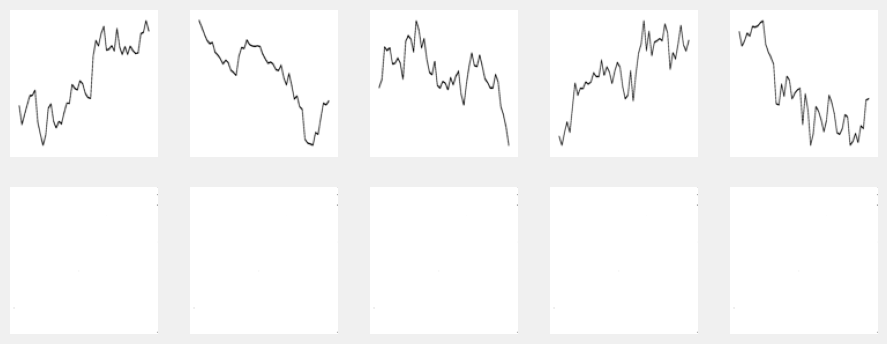

Epoch [13/20], Loss: 0.0031
Epoch [13/20], Loss: 0.0033
Epoch [13/20], Loss: 0.0032
Epoch [13/20], Loss: 0.0033
Epoch [13/20], Loss: 0.0032
Epoch [13/20], Loss: 0.0033
Epoch [13/20], Loss: 0.0033
Epoch [13/20], Loss: 0.0031
Epoch [13/20], Loss: 0.0033
Epoch [13/20], Loss: 0.0031
Epoch [13/20], Loss: 0.0031
Epoch [13/20], Loss: 0.0032
Epoch [13/20], Loss: 0.0032
Epoch [13/20], Loss: 0.0034
Epoch [13/20], Loss: 0.0033
Epoch [13/20], Loss: 0.0031
Epoch [13/20], Loss: 0.0031
Epoch [13/20], Loss: 0.0033
Epoch [13/20], Loss: 0.0033
Epoch [13/20], Loss: 0.0034
Epoch [13/20], Loss: 0.0033
Epoch [13/20], Loss: 0.0033
Epoch [13/20], Loss: 0.0033
Epoch [13/20], Loss: 0.0032
Epoch [13/20], Loss: 0.0032
Epoch [13/20], Loss: 0.0032
Epoch [13/20], Loss: 0.0032
Epoch [13/20], Loss: 0.0031
Epoch [13/20], Loss: 0.0031
Epoch [13/20], Loss: 0.0031
Epoch [13/20], Loss: 0.0032
Epoch [13/20], Loss: 0.0032
Epoch [13/20], Loss: 0.0033
Epoch [13/20], Loss: 0.0033
Epoch [13/20], Loss: 0.0032
Epoch [13/20], Loss:

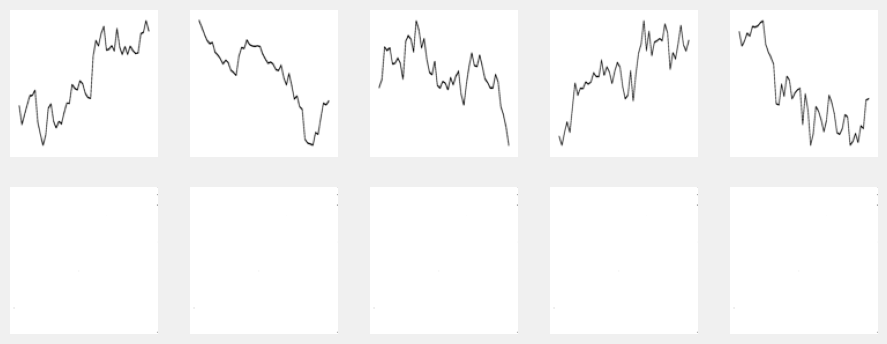

Epoch [14/20], Loss: 0.0033
Epoch [14/20], Loss: 0.0032
Epoch [14/20], Loss: 0.0032
Epoch [14/20], Loss: 0.0031
Epoch [14/20], Loss: 0.0033
Epoch [14/20], Loss: 0.0033
Epoch [14/20], Loss: 0.0031
Epoch [14/20], Loss: 0.0032
Epoch [14/20], Loss: 0.0033
Epoch [14/20], Loss: 0.0034
Epoch [14/20], Loss: 0.0033
Epoch [14/20], Loss: 0.0031
Epoch [14/20], Loss: 0.0032
Epoch [14/20], Loss: 0.0033
Epoch [14/20], Loss: 0.0032
Epoch [14/20], Loss: 0.0032
Epoch [14/20], Loss: 0.0033
Epoch [14/20], Loss: 0.0033
Epoch [14/20], Loss: 0.0030
Epoch [14/20], Loss: 0.0032
Epoch [14/20], Loss: 0.0031
Epoch [14/20], Loss: 0.0032
Epoch [14/20], Loss: 0.0034
Epoch [14/20], Loss: 0.0033
Epoch [14/20], Loss: 0.0032
Epoch [14/20], Loss: 0.0032
Epoch [14/20], Loss: 0.0032
Epoch [14/20], Loss: 0.0031
Epoch [14/20], Loss: 0.0034
Epoch [14/20], Loss: 0.0031
Epoch [14/20], Loss: 0.0031
Epoch [14/20], Loss: 0.0032
Epoch [14/20], Loss: 0.0033
Epoch [14/20], Loss: 0.0031
Epoch [14/20], Loss: 0.0032
Epoch [14/20], Loss:

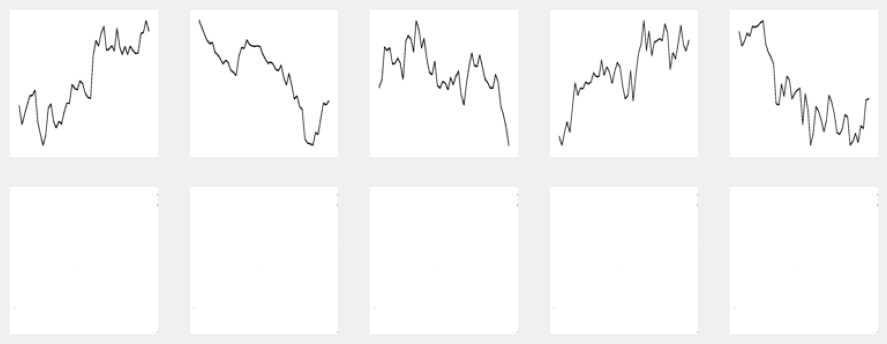

Epoch [15/20], Loss: 0.0033
Epoch [15/20], Loss: 0.0034
Epoch [15/20], Loss: 0.0032
Epoch [15/20], Loss: 0.0034
Epoch [15/20], Loss: 0.0030
Epoch [15/20], Loss: 0.0033
Epoch [15/20], Loss: 0.0032
Epoch [15/20], Loss: 0.0032
Epoch [15/20], Loss: 0.0033
Epoch [15/20], Loss: 0.0032
Epoch [15/20], Loss: 0.0031
Epoch [15/20], Loss: 0.0034
Epoch [15/20], Loss: 0.0032
Epoch [15/20], Loss: 0.0032
Epoch [15/20], Loss: 0.0034
Epoch [15/20], Loss: 0.0031
Epoch [15/20], Loss: 0.0035
Epoch [15/20], Loss: 0.0032
Epoch [15/20], Loss: 0.0032
Epoch [15/20], Loss: 0.0032
Epoch [15/20], Loss: 0.0030
Epoch [15/20], Loss: 0.0033
Epoch [15/20], Loss: 0.0033
Epoch [15/20], Loss: 0.0031
Epoch [15/20], Loss: 0.0033
Epoch [15/20], Loss: 0.0033
Epoch [15/20], Loss: 0.0033
Epoch [15/20], Loss: 0.0032
Epoch [15/20], Loss: 0.0032
Epoch [15/20], Loss: 0.0033
Epoch [15/20], Loss: 0.0033
Epoch [15/20], Loss: 0.0033
Epoch [15/20], Loss: 0.0032
Epoch [15/20], Loss: 0.0031
Epoch [15/20], Loss: 0.0033
Epoch [15/20], Loss:

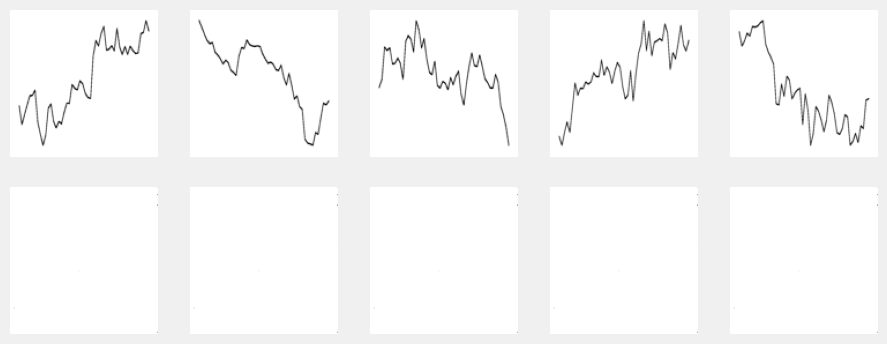

Epoch [16/20], Loss: 0.0032
Epoch [16/20], Loss: 0.0031
Epoch [16/20], Loss: 0.0031
Epoch [16/20], Loss: 0.0033
Epoch [16/20], Loss: 0.0031
Epoch [16/20], Loss: 0.0031
Epoch [16/20], Loss: 0.0033
Epoch [16/20], Loss: 0.0033
Epoch [16/20], Loss: 0.0030
Epoch [16/20], Loss: 0.0034
Epoch [16/20], Loss: 0.0032
Epoch [16/20], Loss: 0.0030
Epoch [16/20], Loss: 0.0033
Epoch [16/20], Loss: 0.0031
Epoch [16/20], Loss: 0.0032
Epoch [16/20], Loss: 0.0031
Epoch [16/20], Loss: 0.0032
Epoch [16/20], Loss: 0.0031
Epoch [16/20], Loss: 0.0031
Epoch [16/20], Loss: 0.0032
Epoch [16/20], Loss: 0.0032
Epoch [16/20], Loss: 0.0032
Epoch [16/20], Loss: 0.0032
Epoch [16/20], Loss: 0.0032
Epoch [16/20], Loss: 0.0035
Epoch [16/20], Loss: 0.0032
Epoch [16/20], Loss: 0.0032
Epoch [16/20], Loss: 0.0033
Epoch [16/20], Loss: 0.0032
Epoch [16/20], Loss: 0.0033
Epoch [16/20], Loss: 0.0032
Epoch [16/20], Loss: 0.0032
Epoch [16/20], Loss: 0.0031
Epoch [16/20], Loss: 0.0032
Epoch [16/20], Loss: 0.0032
Epoch [16/20], Loss:

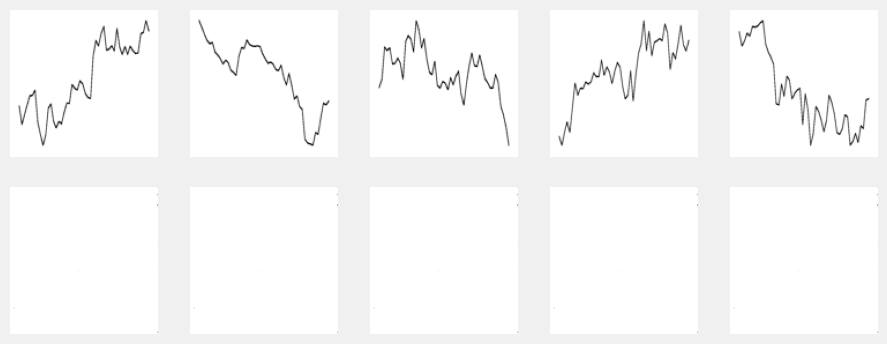

Epoch [17/20], Loss: 0.0034
Epoch [17/20], Loss: 0.0033
Epoch [17/20], Loss: 0.0031
Epoch [17/20], Loss: 0.0034
Epoch [17/20], Loss: 0.0034
Epoch [17/20], Loss: 0.0032
Epoch [17/20], Loss: 0.0033
Epoch [17/20], Loss: 0.0032
Epoch [17/20], Loss: 0.0029
Epoch [17/20], Loss: 0.0033
Epoch [17/20], Loss: 0.0034
Epoch [17/20], Loss: 0.0032
Epoch [17/20], Loss: 0.0031
Epoch [17/20], Loss: 0.0031
Epoch [17/20], Loss: 0.0033
Epoch [17/20], Loss: 0.0032
Epoch [17/20], Loss: 0.0033
Epoch [17/20], Loss: 0.0033
Epoch [17/20], Loss: 0.0032
Epoch [17/20], Loss: 0.0032
Epoch [17/20], Loss: 0.0032
Epoch [17/20], Loss: 0.0032
Epoch [17/20], Loss: 0.0032
Epoch [17/20], Loss: 0.0032
Epoch [17/20], Loss: 0.0034
Epoch [17/20], Loss: 0.0034
Epoch [17/20], Loss: 0.0030
Epoch [17/20], Loss: 0.0032
Epoch [17/20], Loss: 0.0031
Epoch [17/20], Loss: 0.0032
Epoch [17/20], Loss: 0.0032
Epoch [17/20], Loss: 0.0031
Epoch [17/20], Loss: 0.0032
Epoch [17/20], Loss: 0.0033
Epoch [17/20], Loss: 0.0031
Epoch [17/20], Loss:

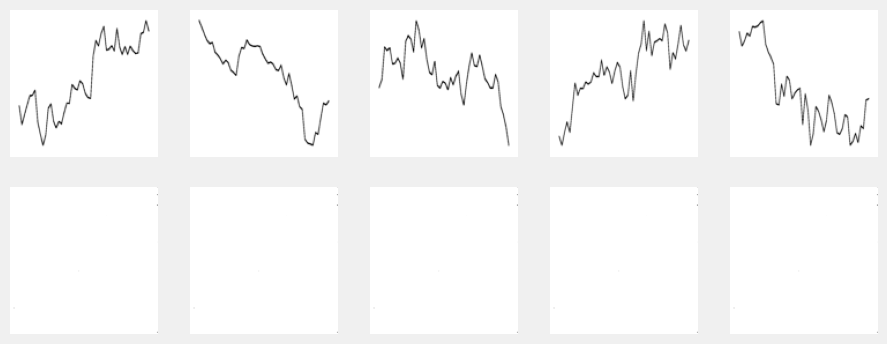

Epoch [18/20], Loss: 0.0032
Epoch [18/20], Loss: 0.0032
Epoch [18/20], Loss: 0.0032
Epoch [18/20], Loss: 0.0032
Epoch [18/20], Loss: 0.0032
Epoch [18/20], Loss: 0.0032
Epoch [18/20], Loss: 0.0033
Epoch [18/20], Loss: 0.0030
Epoch [18/20], Loss: 0.0033
Epoch [18/20], Loss: 0.0033
Epoch [18/20], Loss: 0.0031
Epoch [18/20], Loss: 0.0031
Epoch [18/20], Loss: 0.0033
Epoch [18/20], Loss: 0.0033
Epoch [18/20], Loss: 0.0032
Epoch [18/20], Loss: 0.0032
Epoch [18/20], Loss: 0.0031
Epoch [18/20], Loss: 0.0032
Epoch [18/20], Loss: 0.0033
Epoch [18/20], Loss: 0.0032
Epoch [18/20], Loss: 0.0033
Epoch [18/20], Loss: 0.0031
Epoch [18/20], Loss: 0.0033
Epoch [18/20], Loss: 0.0032
Epoch [18/20], Loss: 0.0032
Epoch [18/20], Loss: 0.0033
Epoch [18/20], Loss: 0.0032
Epoch [18/20], Loss: 0.0033
Epoch [18/20], Loss: 0.0032
Epoch [18/20], Loss: 0.0032
Epoch [18/20], Loss: 0.0033
Epoch [18/20], Loss: 0.0033
Epoch [18/20], Loss: 0.0032
Epoch [18/20], Loss: 0.0031
Epoch [18/20], Loss: 0.0033
Epoch [18/20], Loss:

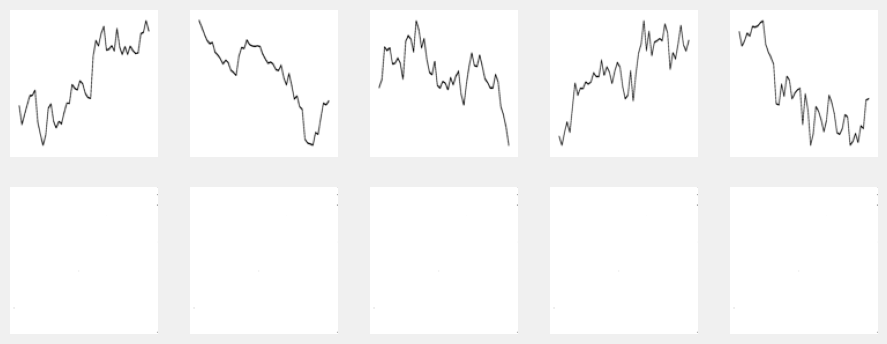

Epoch [19/20], Loss: 0.0031
Epoch [19/20], Loss: 0.0033
Epoch [19/20], Loss: 0.0032
Epoch [19/20], Loss: 0.0033
Epoch [19/20], Loss: 0.0032
Epoch [19/20], Loss: 0.0030
Epoch [19/20], Loss: 0.0034
Epoch [19/20], Loss: 0.0033
Epoch [19/20], Loss: 0.0032
Epoch [19/20], Loss: 0.0034
Epoch [19/20], Loss: 0.0033
Epoch [19/20], Loss: 0.0031
Epoch [19/20], Loss: 0.0032
Epoch [19/20], Loss: 0.0032
Epoch [19/20], Loss: 0.0033
Epoch [19/20], Loss: 0.0031
Epoch [19/20], Loss: 0.0033
Epoch [19/20], Loss: 0.0031
Epoch [19/20], Loss: 0.0033
Epoch [19/20], Loss: 0.0032
Epoch [19/20], Loss: 0.0032
Epoch [19/20], Loss: 0.0033
Epoch [19/20], Loss: 0.0031
Epoch [19/20], Loss: 0.0032
Epoch [19/20], Loss: 0.0031
Epoch [19/20], Loss: 0.0030
Epoch [19/20], Loss: 0.0032
Epoch [19/20], Loss: 0.0031
Epoch [19/20], Loss: 0.0031
Epoch [19/20], Loss: 0.0032
Epoch [19/20], Loss: 0.0030
Epoch [19/20], Loss: 0.0032
Epoch [19/20], Loss: 0.0033
Epoch [19/20], Loss: 0.0035
Epoch [19/20], Loss: 0.0031
Epoch [19/20], Loss:

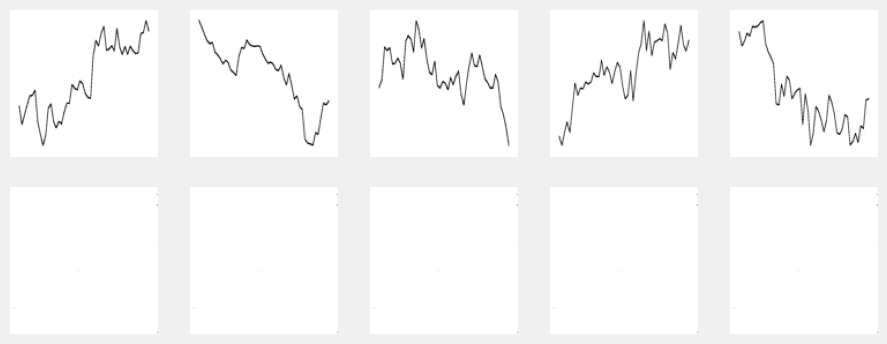

Epoch [20/20], Loss: 0.0033
Epoch [20/20], Loss: 0.0032
Epoch [20/20], Loss: 0.0030
Epoch [20/20], Loss: 0.0031
Epoch [20/20], Loss: 0.0032
Epoch [20/20], Loss: 0.0033
Epoch [20/20], Loss: 0.0032
Epoch [20/20], Loss: 0.0033
Epoch [20/20], Loss: 0.0033
Epoch [20/20], Loss: 0.0031
Epoch [20/20], Loss: 0.0032
Epoch [20/20], Loss: 0.0033
Epoch [20/20], Loss: 0.0031
Epoch [20/20], Loss: 0.0032
Epoch [20/20], Loss: 0.0032
Epoch [20/20], Loss: 0.0034
Epoch [20/20], Loss: 0.0033
Epoch [20/20], Loss: 0.0034
Epoch [20/20], Loss: 0.0032
Epoch [20/20], Loss: 0.0033
Epoch [20/20], Loss: 0.0032
Epoch [20/20], Loss: 0.0033
Epoch [20/20], Loss: 0.0033
Epoch [20/20], Loss: 0.0033
Epoch [20/20], Loss: 0.0032
Epoch [20/20], Loss: 0.0032
Epoch [20/20], Loss: 0.0031
Epoch [20/20], Loss: 0.0032
Epoch [20/20], Loss: 0.0031
Epoch [20/20], Loss: 0.0034
Epoch [20/20], Loss: 0.0032
Epoch [20/20], Loss: 0.0033
Epoch [20/20], Loss: 0.0032
Epoch [20/20], Loss: 0.0032
Epoch [20/20], Loss: 0.0032
Epoch [20/20], Loss:

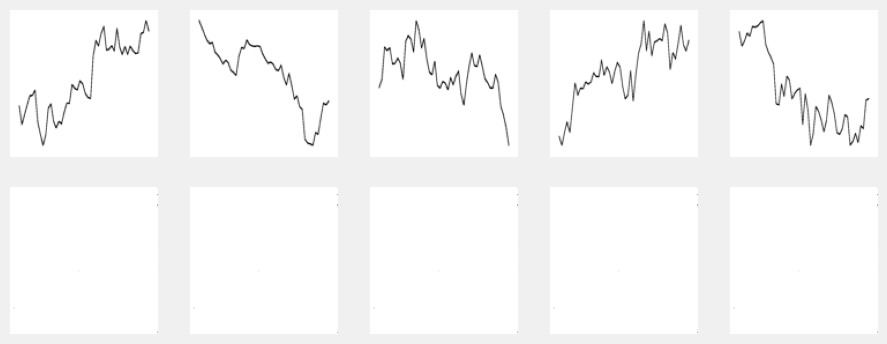

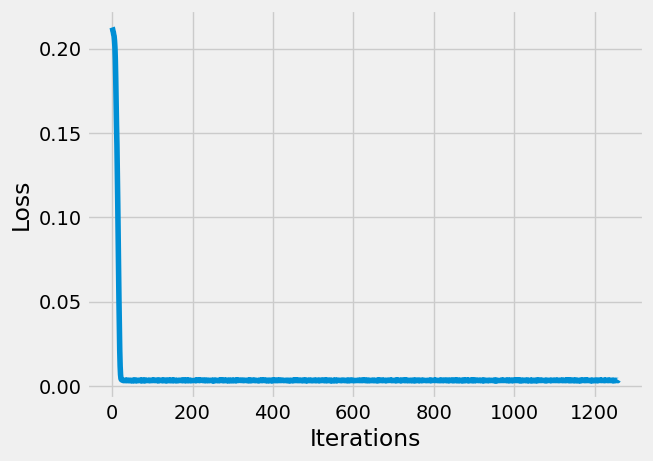

In [15]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define a custom dataset class
class ImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __getitem__(self, index):
        image = Image.open(self.image_paths[index]).convert('L')  # Convert to grayscale
        if self.transform:
            image = self.transform(image)
        return image

    def __len__(self):
        return len(self.image_paths)

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load image paths
image_paths = glob("/content/drive/MyDrive/img_data/*.png")

# Split data into train and test sets
train_paths, test_paths = train_test_split(image_paths, test_size=0.2, random_state=42)

# Create instances of the datasets with transformations
train_dataset = ImageDataset(image_paths=train_paths, transform=transform)
test_dataset = ImageDataset(image_paths=test_paths, transform=transform)

# Create data loaders
train_dl = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
test_dl = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

class VisualAE(torch.nn.Module):
    def __init__(self):
        super(VisualAE, self).__init__()

        # Encoder
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            torch.nn.ReLU(),
            torch.nn.Flatten()
        )

        # Decoder
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(64 * 16 * 16, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64 * 16 * 16),
            torch.nn.ReLU(),
            torch.nn.Unflatten(1, (64, 16, 16)),
            torch.nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            torch.nn.ReLU(),
            torch.nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            torch.nn.ReLU(),
            torch.nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    def visualize_reconstruction(self, data_loader, num_samples=5):
      for samples in data_loader:
        break  # Break after the first batch
      samples = samples[:num_samples]

      reconstructed = self(samples)

      fig, axes = plt.subplots(2, num_samples, figsize=(num_samples * 2, 4))

      for i in range(num_samples):
        axes[0, i].imshow(samples[i][0].numpy(), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(reconstructed[i][0].detach().numpy(), cmap='gray')
        axes[1, i].axis('off')

      plt.show()




# Create an instance of the VisualAE model
visual_ae = VisualAE()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.001
optimizer = torch.optim.Adam(visual_ae.parameters(), lr=1e-3, weight_decay=1e-8)

# Training loop
epochs = 20
outputs = []
losses = []

for epoch in range(epochs):
    for image_batch in train_dl:
        # Forward pass
        reconstructed = visual_ae(image_batch)

        # Calculate the loss
        loss = loss_function(reconstructed, image_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store the losses for plotting
        losses.append(float(loss.detach().detach()))
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    # Visualize reconstructed samples
    visual_ae.visualize_reconstruction(test_dl)

# Plotting the losses
plt.style.use('fivethirtyeight')
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from PIL import Image
from sklearn.model_selection import train_test_split

# Replace this with your actual dataset loading logic
def load_images_from_directory(directory):
    image_paths = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.png')]
    images = [np.array(Image.open(path).convert('L')) for path in image_paths]
    return np.stack(images)

# Specify your dataset directory
dataset_directory = '/content/drive/MyDrive/img_data'

# Load images from the directory
images_data = load_images_from_directory(dataset_directory)

# Preprocess the data and normalize it between 0 and 1
images_data = images_data.astype('float32') / 255.0

# Split the data into training and validation sets
train_images, val_images = train_test_split(images_data, test_size=0.2, random_state=42)

# Define the autoencoder model
input_img = Input(shape=(288, 576, 1))  # Grayscale image has 1 channel

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)  # Output has 1 channel for grayscale image

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Display model summary
autoencoder.summary()

# Train the autoencoder
autoencoder.fit(
    train_images, train_images,
    epochs=10,
    batch_size=32,
    shuffle=True,
    validation_data=(val_images, val_images)
)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 288, 576, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 288, 576, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 144, 288, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 144, 288, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 72, 144, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 144, 128)      73856 